## Histograms Quiz

In [53]:
import cv2 as cv
import numpy as np
import mods.kYaDemo as kdm
from matplotlib import pyplot as plt

1. **Compute a grayscale histogram for the image. Approximately what bin number has the highest pixel count?**
- *Answer:  Bin #46*  

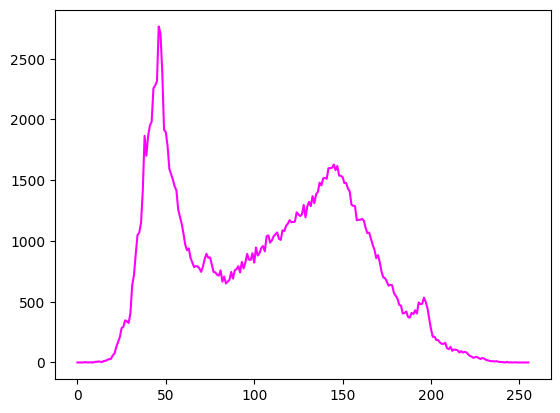

The bin number with the highest pixel count is: 46


In [54]:
img = cv.imread('./src/horseshoe_bend.png', cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist, color="magenta")
plt.show()

print(f"The bin number with the highest pixel count is: {np.argmax(hist)}")

2. **Compute a flattened RGB histogram for our image. Which of the following is true:**
- *Answer:  The green bin count is greater than the blue bin count for bin #100 - True*  

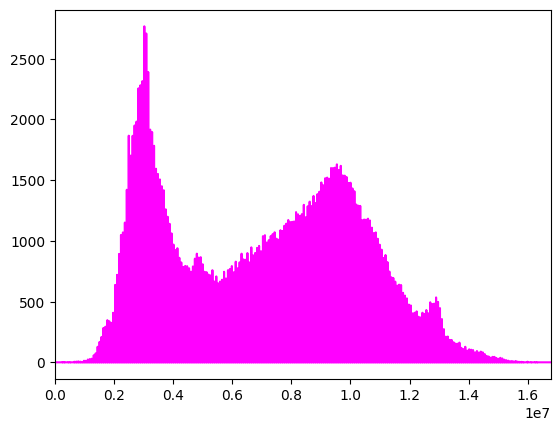

The green bin count is greater than the blue bin count for bin #100:  True
The blue bin count is less than the red bin count for bin #250:  False
The blue bin count is greater than the green bin count for bin #200:  False
The red bin count is larger than the green bin count for bin #200:  False


In [55]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Calculate histogram
hist = cv.calcHist([img], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

# Flatten histogram
hist_flat = hist.flatten()

# Plot histogram
plt.plot(hist_flat, color="magenta")
plt.xlim([0, 256*256*256])
plt.show()

# Check the statements
green_count = hist_flat[100*256*256 + 100*256 : 100*256*256 + 101*256].sum()
blue_count = hist_flat[250*256*256 + 0*256 : 250*256*256 + 1*256].sum()
green_count_2 = hist_flat[200*256*256 + 100*256 : 200*256*256 + 101*256].sum()
red_count = hist_flat[200*256*256 + 0*256 : 200*256*256 + 1*256].sum()

print("The green bin count is greater than the blue bin count for bin #100: ", green_count > blue_count)
print("The blue bin count is less than the red bin count for bin #250: ", blue_count < red_count)
print("The blue bin count is greater than the green bin count for bin #200: ", blue_count > green_count_2)
print("The red bin count is larger than the green bin count for bin #200: ", red_count > green_count_2)

3. **Compute a 2D color histogram for the Blue and Red channels of our image using 32 x 32 bins. Which bins have the largest pixel count?**
- *Answer:  x=4, y=5*  

In [56]:
# Split the image into channels
red, green, blue = cv.split(img)

# Define the number of bins for the histogram
bins = 32

# Compute the 2D color histogram for the Blue and Red channels
hist, x_edges, y_edges = np.histogram2d(blue.ravel(), red.ravel(), bins=bins)

# Find the bin with the largest pixel count
x, y = np.unravel_index(hist.argmax(), hist.shape)

# Print the result
print(f"x={x}, y={y}")

x=5, y=5


4. **Perform histogram equalization on our image. After performing histogram equalization, what is the value of the pixel located at x=146, y=272?**
- *Answer:  210*  

In [57]:
# Load the image
img = cv.imread('./src/horseshoe_bend.png', cv.IMREAD_GRAYSCALE)

# Perform histogram equalization
img_eq = cv.equalizeHist(img)

# Access the pixel value at x=146, y=272
pixel_value = img_eq[272, 146]

print("Pixel value:", pixel_value)

Pixel value: 209


5. **Compute a 3D color histogram using 8 bins for the Red channel, 16 bins for the Green channel, and 9 bins for the Blue channel. What is the total # of bins in our histogram?**
- *Answer:  1152*  

In [58]:
# Define number of bins for each channel
bins = [8, 16, 9]

# Calculate histogram
hist, edges = np.histogramdd(img.reshape(-1, 3), bins=bins)

# Calculate total number of bins
num_bins = np.prod(hist.shape)

print("Total number of bins:", num_bins)

Total number of bins: 1152
